In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

city_data_filename = "city_data.csv"
ride_data_filename = "ride_data.csv"

city_data_df = pd.read_csv(city_data_filename)
ride_data_df = pd.read_csv(ride_data_filename)

data_df = pd.merge(ride_data_df, city_data_df, on="city", how="left")

#print(ride_data_df["city"].count())
#print(city_data_df["city"].nunique())
#print(ride_data_df["city"].nunique())
#print(data_df.count())
data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


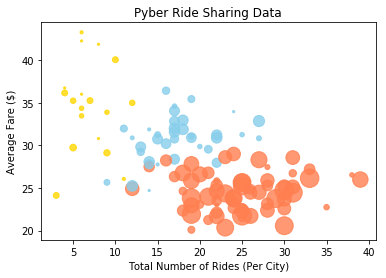

In [95]:
average_fare_per_city = data_df.groupby("city")["fare"].mean()
total_number_of_rides_per_city = data_df.groupby("city")["ride_id"].count()
total_number_of_drivers_per_city = data_df.groupby("city")["driver_count"].mean()
city_type = data_df.groupby("city")["type"].unique()

bubble_color = []
for city_t in city_type:
    if city_t == "Urban":
        bubble_color.append("Coral")
    elif city_t == "Suburban":
        bubble_color.append("SkyBlue")
    else:
        bubble_color.append("Gold")

plt.scatter(x=total_number_of_rides_per_city, y=average_fare_per_city, s=total_number_of_drivers_per_city*5, c=bubble_color, alpha=0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
plt.show()
